# 1. Get the Data

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [6]:
X, y = mnist['data'], mnist['target']

In [52]:
y = y.astype(int)

## 1.1 Taking look at one picture

In [54]:
import numpy as np
import pandas as pd

(-0.5, 27.5, 27.5, -0.5)

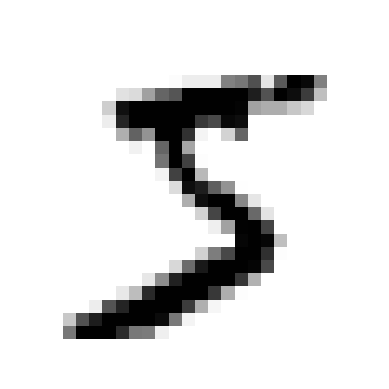

In [55]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

## 1.2 Splitting into train and test data

In [56]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [57]:
## Shuffling the training dataset
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

# 2. Training Binary Classifier

In [62]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [64]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [66]:
sgd_clf.predict([some_digit])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# 3. Performance Measures

## 3.1 Accuracy

In [68]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
stratified_cv = StratifiedKFold(n_splits=3)
cross_val_score(sgd_clf, X_train, y_train_5, cv=stratified_cv, scoring='accuracy')

array([0.97015, 0.9593 , 0.95215])

## 3.2 Confusion Matrix

In [69]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=stratified_cv)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54265,   314],
       [ 2054,  3367]], dtype=int64)

In [76]:
from sklearn.metrics import precision_score, recall_score
print(f"Precision: {precision_score(y_train_5, y_train_pred)}")
print(f"Recall: {recall_score(y_train_5, y_train_pred)}")

Precision: 0.9146970931812007
Recall: 0.6211031175059952


In [78]:
from sklearn.metrics import f1_score
print(f"F1 Score: {f1_score(y_train_5, y_train_pred)}")

F1 Score: 0.7398373983739838


In [81]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=stratified_cv, method='decision_function')

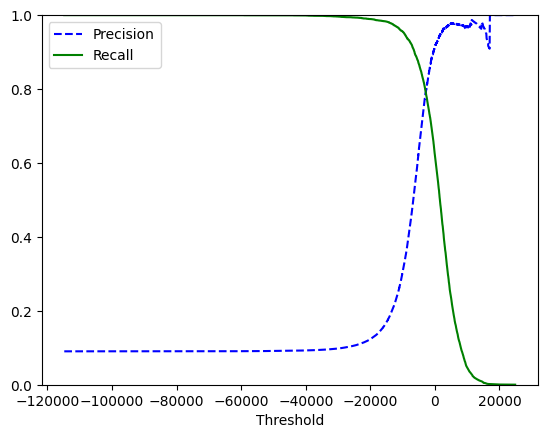

In [84]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

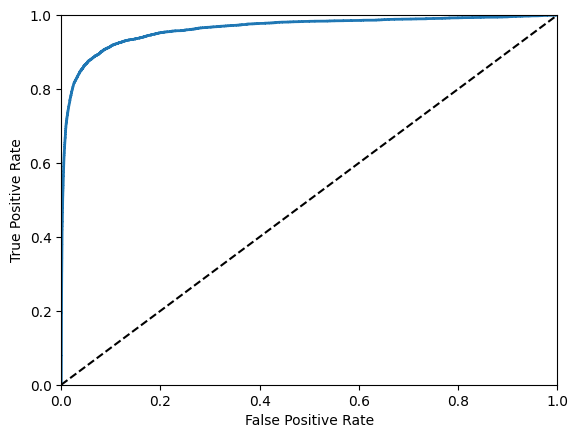

In [87]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)

In [88]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9632136630733213

# 4. Multiclass Classification

In [89]:
sgd_clf_multiclass = SGDClassifier(random_state=42)
sgd_clf_multiclass.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [90]:
sgd_clf_multiclass.predict([some_digit])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([5])

In [91]:
sgd_clf_multiclass.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
sgd_clf_multiclass.decision_function([some_digit])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-14945.264777  , -32755.20966985,  -9812.62162836,
         -4148.34053447, -17674.58424661,     60.27137133,
        -20757.08346822, -18405.98472528,  -8414.67168831,
        -15855.26290993]])

In [93]:
# Cross Validation
cross_val_score(sgd_clf_multiclass, X_train, y_train, cv=stratified_cv, scoring='accuracy')

array([0.85545, 0.8308 , 0.89135])

# 5. Error Analysis

In [94]:
y_train_pred_multiclass = cross_val_predict(sgd_clf_multiclass, X_train, y_train, cv=stratified_cv)

In [97]:
conf_matrix = confusion_matrix(y_train, y_train_pred_multiclass)
conf_matrix

array([[5718,    1,   30,   12,    5,   34,   34,    2,   82,    5],
       [   3, 6332,   58,   20,    6,   32,   21,    8,  242,   20],
       [  80,   50, 5250,  111,   35,   33,   74,   52,  238,   35],
       [  43,   18,  227, 4951,   11,  292,   21,   46,  454,   68],
       [  36,   20,   85,   16, 4421,   33,   81,   61,  836,  253],
       [  90,   18,   54,  178,   40, 4315,  112,   16,  546,   52],
       [  51,   13,   93,    2,   22,   97, 5514,    1,  123,    2],
       [  28,   19,  137,   54,   49,   22,    6, 5517,  171,  262],
       [  70,   55,   76,  135,   38,  156,   35,   15, 5215,   56],
       [  33,   18,   43,   82,   95,   93,    2,  206, 1058, 4319]],
      dtype=int64)

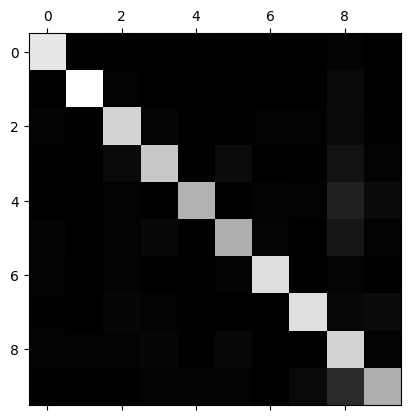

In [99]:
plt.matshow(conf_matrix, cmap=plt.cm.grey)

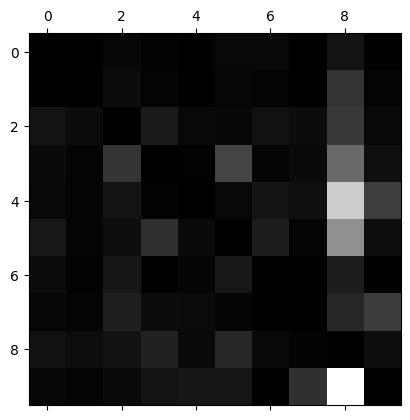

In [101]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix/row_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()